# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Cut Nabilah Putri Ulanty
- **Email:** mc319d5x2391@student.devacademy.id
- **ID Dicoding:** MC319D5X2391

## Menentukan Pertanyaan Bisnis

- Bagaimana rata - rata kualitas udara (AQI) per tahun (2013-2017)?
- Bagaimana rata - rata kadar tiap polutan per tahun?
- Bagaimana rata - rata kualitas udara (AQI) per jamnya di tahun 2013-2017?
- Adakah faktor cuaca yang mempengaruhi kualitas udara?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd
import statsmodels.api as sm
from scipy.stats import skew

## Data Wrangling

### Gathering Data

In [262]:
aotizhongxin_df = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [263]:
print("KOLOM dan BARIS")
print(f"Jumlah baris dan kolom pada dataset aotizhongxin_df: {aotizhongxin_df.shape}")

KOLOM dan BARIS
Jumlah baris dan kolom pada dataset aotizhongxin_df: (35064, 18)


In [264]:
def siklus_pencatatan(df, df_name):
  nilai_kolom_jam=sorted(df['hour'].unique())
  print(f"Nilai dalam kolom 'hour' pada dataset {df_name}: {nilai_kolom_jam}")

siklus_pencatatan(aotizhongxin_df, "Aotizhongxin")

Nilai dalam kolom 'hour' pada dataset Aotizhongxin: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


**Insight:**
- **Dataset memiliki jumlah yang sama yaitu 35064 baris dan 18 kolom.** kolom-kolom tersebut di antaranya:
  1. No (Nomor urut data)
  2. year (Tahun)
  3. month(Bulan)
  4. day (Hari/Tanggal)
  5. hour (Jam)
  6. PM2.5 (Particulate Matter 2.5, partikel berukuran 2.5 yang merupakan polutan udara)
  7. PM10 (Particulate Matter 10, partikel berukuran 10 yang merupakan polutan udara)
  8. SO2 (Sulfur dioksida dalam udara)
  9. NO2 (Nitrogen Dioksida dalam udara)
  10. CO (karbon monoksida dalam udara)
  11. O3 (Ozon)
  12. TEMP (Temperatur/suhu udara)
  13. PRESS (Tekanan udara)
  14. DEWP (Dew Point / titik embun)
  15. RAIN (curah hujan)
  16. wd (wind direction/arah angin)
  17. WSPM (wind speed/ kecepatan angin)
  18. station (Nama stasiun)


- Pencatatan dilakukan sebanyak 24 kali dilihat berdasarkan unique value pada kolom hour yang menghasilkan list berisikan [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]. **Artinya pencatatan udara dilakukan sebanyak 24 kali dalam 1 hari dan dilakukan tiap 1 jam**

### Assessing Data

In [265]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [266]:
aotizhongxin_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [267]:
print("jumlah duplikasi: ", aotizhongxin_df.duplicated().sum())

jumlah duplikasi:  0


In [268]:
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight :**
**DATASET AOTIZHONGXIN**

*   Terdapat missing value pada PM2.5, SO2, NO2, CO,O3, Temp, PRES, DEWP, RAIN, WD, WSPM
*   Tidak terdapat duplikasi data
*   Terdapat keanehan yang kemungkinan inacurrate value/outlier pada:
  1.   nilai maksimum CO yaitu 10000.00 dibandingkan dengan mean (1262.43), median (900) dan Q3 (1500).
  2.   nilai maksimum PM2.5 (898) dibandingkan median(58) dan Q3 (114).
  3. nilai maksimum PM10 (984) sedangkan median (87) dan Q3(155)

*   CO punya standar deviasi 1221.43 yang hampir dekat dengan mean-nya(1262.94) menunjukkan bahwa distribusi CO sangat bervariasi dan kemungkinan memiliki outlier
*O3 memiliki standar deviasi 57.91, tetapi distribusinya lebih merata karena median dan Q3 tidak terlalu jauh.

* Beberapa nilai lain juga memiliki penyebaran data yang tinggi, misalnya TEMP minimum terlalu ekstrem (-36.1) dan RAIN maksimum sangat tinggi (72.5).

### Cleaning Data

Rename kolom agar lebih dinamis

In [ ]:
# Menghapus baris dengan nilai NaN di kolom 'year', 'month', 'day', 'hour'
aotizhongxin_df.dropna(subset=['year', 'month', 'day', 'hour'], inplace=True)

# Membuat month dari angka menjadi nama bulan
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
aotizhongxin_df['month'] = aotizhongxin_df['month'].astype(int).map(month_mapping)

# Mengubah format hour jadi HH:MM
aotizhongxin_df['hour'] = aotizhongxin_df['hour'].astype(int).astype(str).str.zfill(2) + ':00'

# Menggabungkan semua menjadi datetime (YYYY-MM-DD HH:MM)
aotizhongxin_df['date'] = pd.to_datetime(
    aotizhongxin_df['year'].astype(str) + '-' + aotizhongxin_df['month'] + '-' + aotizhongxin_df['day'].astype(str) + ' ' + aotizhongxin_df['hour'],
    format='%Y-%b-%d %H:%M',
    errors='coerce'
)

# Mengubah kolom date menjadi hanya YYYY-MM-DD (tanpa jam)
aotizhongxin_df['date'] = aotizhongxin_df['date'].dt.date

# Menambahkan nama hari
aotizhongxin_df['weekday'] = pd.to_datetime(aotizhongxin_df['date']).dt.day_name()

print(aotizhongxin_df[['year', 'month', 'day', 'date', 'hour', 'weekday']].head())

# Dictionary untuk mapping singkatan ke nama lengkap arah mata angin
wind_direction_mapping = {
    'N': 'North', 'S': 'South', 'E': 'East', 'W': 'West',
    'NE': 'Northeast', 'NW': 'Northwest', 'SE': 'Southeast', 'SW': 'Southwest',
    'NNE': 'North-Northeast', 'NNW': 'North-Northwest',
    'ENE': 'East-Northeast', 'ESE': 'East-Southeast',
    'SSE': 'South-Southeast', 'SSW': 'South-Southwest',
    'WSW': 'West-Southwest', 'WNW': 'West-Northwest'
}

# Mengubah nilai pada kolom wd menggunakan mapping
aotizhongxin_df['wd'] = aotizhongxin_df['wd'].map(wind_direction_mapping)

# Cek hasil perubahan
print(aotizhongxin_df[['wd']].drop_duplicates().dropna())

   year month  day        date   hour weekday
0  2013   Mar    1  2013-03-01  00:00  Friday
1  2013   Mar    1  2013-03-01  01:00  Friday
2  2013   Mar    1  2013-03-01  02:00  Friday
3  2013   Mar    1  2013-03-01  03:00  Friday
4  2013   Mar    1  2013-03-01  04:00  Friday
                 wd
0   North-Northwest
1             North
3         Northwest
6   North-Northeast
21   East-Northeast
26             East
31        Northeast
34             West
35  South-Southwest
36   West-Southwest
38        Southeast
39   West-Northwest
41  South-Southeast
59   East-Southeast
85            South
86        Southwest


Mengatasi missing value

In [ ]:
# Cek jumlah missing value sebelum interpolasi
print("Jumlah Missing Values Sebelum Cleaning:\n", aotizhongxin_df.isnull().sum())

# Memilih kolom numerik yang akan diinterpolasi
numerical_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolasi untuk kolom numerik (time series) dengan metode linear
aotizhongxin_df[numerical_cols] = aotizhongxin_df[numerical_cols].interpolate(method='linear', limit_direction='both')

# Interpolasi untuk kolom kategorikal (wind direction) menggunakan mode jika masih ada missing value
aotizhongxin_df['wd'].fillna(aotizhongxin_df['wd'].mode()[0], inplace=True)

# Cek ulang apakah masih ada missing value
print("Jumlah Missing Values Setelah Cleaning:\n", aotizhongxin_df.isnull().sum())

Jumlah Missing Values Sebelum Cleaning:
 No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
date          0
weekday       0
dtype: int64
Jumlah Missing Values Setelah Cleaning:
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
weekday    0
dtype: int64


<ipython-input-270-ed3c360f7e37>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aotizhongxin_df['wd'].fillna(aotizhongxin_df['wd'].mode()[0], inplace=True)


Mengatasi nilai outlier

In [ ]:
# Memilih kolom numerik yang diperiksa outliernya
numerical_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]

# Loop setiap kolom numerik
for col in numerical_cols:
    # Hitung Q1, Q3, dan IQR
    Q1 = aotizhongxin_df[col].quantile(0.25)
    Q3 = aotizhongxin_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    outlier_index = (aotizhongxin_df[col] < lower_bound) | (aotizhongxin_df[col] > upper_bound)

    # Imputasi outlier dengan angka acak(Rand mean) antara Q1 - Q3
    aotizhongxin_df.loc[outlier_index, col] = np.random.uniform(Q1, Q3, size=outlier_index.sum())

# Cek hasil dataset setelah imputasi
print("Dataset setelah Imputasi IQR dengan Rand Mean:", aotizhongxin_df.shape)

# Tampilkan statistik deskriptif setelah imputasi
aotizhongxin_df.describe()

Dataset setelah Imputasi IQR dengan Rand Mean: (35064, 20)


,No,year,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.0,35064.000000
mean,17532.500000,2014.662560,15.729637,70.061773,99.632432,12.044652,57.089176,985.011157,48.014852,13.581414,1011.851650,3.120296,0.0,1.532744
std,10122.249256,1.177213,8.800218,57.802048,74.038250,11.110441,33.547079,637.794578,44.797814,11.400426,10.404517,13.690314,0.0,0.910585
min,1.000000,2013.000000,1.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.0,0.000000
25%,8766.750000,2014.000000,8.000000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.0,0.900000
50%,17532.500000,2015.000000,16.000000,55.000000,84.000000,8.000000,52.564116,800.000000,39.000000,14.500000,1011.400000,3.800000,0.0,1.400000
75%,26298.250000,2016.000000,23.000000,101.996288,144.000000,17.000000,79.000000,1300.000000,74.000000,23.300000,1020.100000,15.600000,0.0,2.000000
max,35064.000000,2017.000000,31.000000,252.000000,328.000000,50.000000,157.111111,3000.000000,190.333333,40.500000,1042.000000,28.500000,0.0,4.100000


In [ ]:
# Cek skewness untuk setiap kolom numerik
skewness_values = aotizhongxin_df[numerical_cols].apply(skew, nan_policy='omit')

# Tampilkan hasilnya
print("Skewness dari setiap kolom numerik:")
print(skewness_values)

Skewness dari setiap kolom numerik:
PM2.5    1.038622
PM10     0.871935
SO2      1.378532
NO2      0.599089
CO       1.117805
O3       0.980457
TEMP    -0.093854
PRES     0.110941
DEWP    -0.212799
RAIN          NaN
WSPM     0.690711
dtype: float64


**Insight :**

*   Missing values pada PM2.5, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WD, dan WSPM diatasi dengan interpolasi karena merupakan data time series (pencatatan dilakukan perjam) untuk mempertahankan tren data  berdasarkan titik sebelum dan sesudahnya tanpa mengubah distribusi secara signifikan. kolom wd diisi dengan mode karna bersifat kategorikal. setelah di lakukan imputasi sudah tidak ada yang memiliki missing value
*   Nilai Outlier pada data numerik diidentifikasi dengan IQR, Outlier tidak dihapus melainkan diimputasi dengan Rand Mean untuk menghindari distorsi data akibat penghapusan nilai ekstrem / kehilangan informasi penting
- Skewness tetap tinggi pada SO2, CO, dan PM2.5, tetapi transformasi tidak diperlukan karena distribusi yang tidak normal adalah mungkin karakteristik alami polusi udara dan masih diperlukan, dan analisis yang dilakukan tidak bergantung pada distribusi normal.



## Exploratory Data Analysis (EDA)

### STANDAR AQI (Air Quality Index)
Berdasarkan  EPA (Badan Perlindungan Lingkungan AS) dan disesuaikan dengan panduan WHO:
sumber : [link text](https://www.epa.gov/aqi)
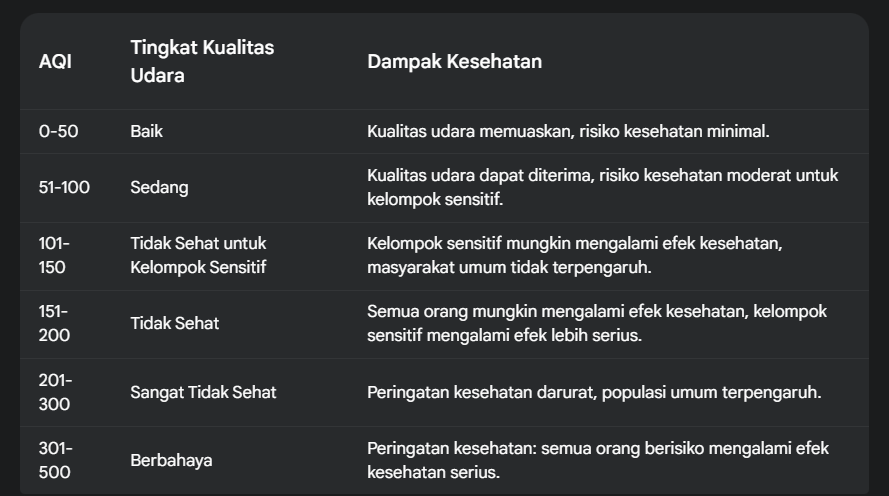

Tabel Indeks Kualitas Udara (AQI) Berdasarkan Polutan:
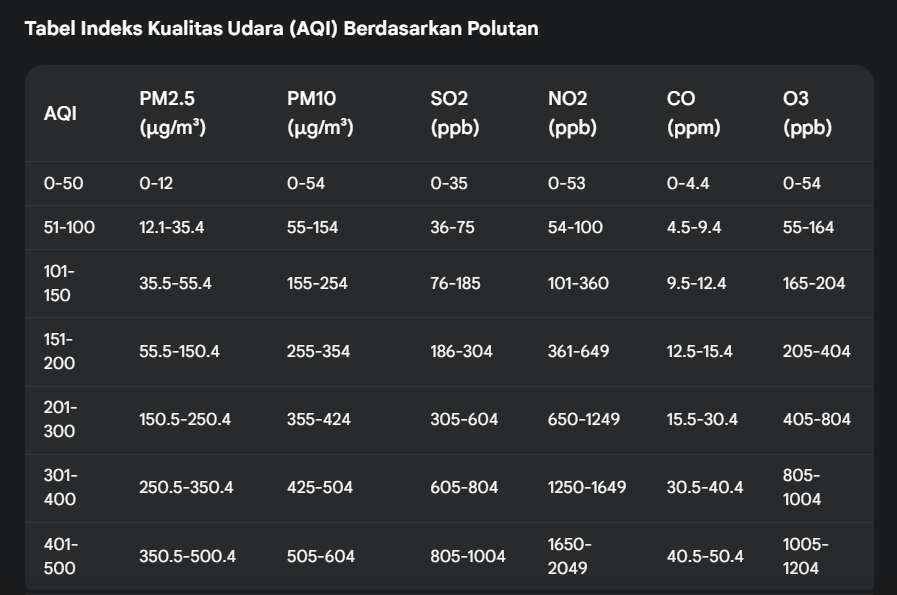

Rumus Umum :
AQI = [(I_high - I_low) / (BP_high - BP_low)] * (C_p - BP_low) + I_low

- C_p: Konsentrasi polutan
- BP_high: Batas atas rentang konsentrasi
- BP_low: Batas bawah rentang konsentrasi
- I_high: Indeks AQI batas atas
- I_low: Indeks AQI batas bawah

### Explore Dataset

In [273]:
aotizhongxin_df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,weekday
0,1,2013,Mar,1,00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,North-Northwest,1.857227,Aotizhongxin,2013-03-01,Friday
1,2,2013,Mar,1,01:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,North,1.135392,Aotizhongxin,2013-03-01,Friday
2,3,2013,Mar,1,02:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,North-Northwest,1.349597,Aotizhongxin,2013-03-01,Friday
3,4,2013,Mar,1,03:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,Northwest,3.100000,Aotizhongxin,2013-03-01,Friday
4,5,2013,Mar,1,04:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,North,2.000000,Aotizhongxin,2013-03-01,Friday
5,6,2013,Mar,1,05:00,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,North,3.700000,Aotizhongxin,2013-03-01,Friday
6,7,2013,Mar,1,06:00,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,North-Northeast,2.500000,Aotizhongxin,2013-03-01,Friday
7,8,2013,Mar,1,07:00,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,North-Northwest,3.800000,Aotizhongxin,2013-03-01,Friday
8,9,2013,Mar,1,08:00,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,North-Northwest,4.100000,Aotizhongxin,2013-03-01,Friday
9,10,2013,Mar,1,09:00,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,North,2.600000,Aotizhongxin,2013-03-01,Friday


Membuat fungsi untuk menghitung AQI dan ketegori kualitas udara

In [274]:
import pandas as pd
import numpy as np

df = aotizhongxin_df

# Konversi CO dari ppb ke mg/m³
df['CO'] = (df['CO'] * 28.01) / (24.45 * 1000)

# Fungsi untuk menghitung AQI dari masing-masing polutan
def calculate_aqi_pm25(pm25):
    if pm25 <= 12:
        return pm25 / 12 * 50
    elif pm25 <= 35.4:
        return (pm25 - 12.1) / (35.4 - 12) * 50 + 51
    elif pm25 <= 55.4:
        return (pm25 - 35.5) / (55.4 - 35.4) * 50 + 101
    elif pm25 <= 150.4:
        return (pm25 - 55.5) / (150.4 - 55.4) * 50 + 151
    elif pm25 <= 250.4:
        return (pm25 - 150.5) / (250.4 - 150.4) * 50 + 201
    elif pm25 <= 350.4:
        return (pm25 - 250.5) / (350.4 - 250.4) * 50 + 301
    elif pm25 <= 500.4:
        return (pm25 - 350.5) / (500.4 - 350.4) * 50 + 401
    else:
        return 500

def calculate_aqi_pm10(pm10):
    if pm10 <= 54:
        return pm10 / 54 * 50
    elif pm10 <= 154:
        return (pm10 - 55) / (154 - 54) * 50 + 51
    elif pm10 <= 254:
        return (pm10 - 155) / (254 - 154) * 50 + 101
    elif pm10 <= 354:
        return (pm10 - 255) / (354 - 254) * 50 + 151
    elif pm10 <= 424:
        return (pm10 - 355) / (424 - 354) * 50 + 201
    elif pm10 <= 504:
        return (pm10 - 425) / (504 - 424) * 50 + 301
    elif pm10 <= 604:
        return (pm10 - 505) / (604 - 504) * 50 + 401
    else:
        return 500

def calculate_aqi_so2(so2):
    if so2 <= 35:
        return so2 / 35 * 50
    elif so2 <= 75:
        return (so2 - 36) / (75 - 35) * 50 + 51
    elif so2 <= 185:
        return (so2 - 76) / (185 - 75) * 50 + 101
    elif so2 <= 304:
        return (so2 - 186) / (304 - 185) * 50 + 151
    elif so2 <= 604:
        return (so2 - 305) / (604 - 304) * 50 + 201
    elif so2 <= 804:
        return (so2 - 605) / (804 - 604) * 50 + 301
    elif so2 <= 1004:
        return (so2 - 805) / (1004 - 804) * 50 + 401
    else:
        return 500

def calculate_aqi_no2(no2):
    if no2 <= 53:
        return no2 / 53 * 50
    elif no2 <= 100:
        return (no2 - 54) / (100 - 53) * 50 + 51
    elif no2 <= 360:
        return (no2 - 101) / (360 - 100) * 50 + 101
    elif no2 <= 649:
        return (no2 - 361) / (649 - 360) * 50 + 151
    elif no2 <= 1249:
        return (no2 - 650) / (1249 - 649) * 50 + 201
    elif no2 <= 1649:
        return (no2 - 1250) / (1649 - 1249) * 50 + 301
    elif no2 <= 2049:
        return (no2 - 1650) / (2049 - 1649) * 50 + 401
    else:
        return 500

def calculate_aqi_o3(o3):
    if o3 <= 54:
        return o3 / 54 * 50
    elif o3 <= 164:
        return (o3 - 55) / (164 - 54) * 50 + 51
    elif o3 <= 204:
        return (o3 - 165) / (204 - 164) * 50 + 101
    elif o3 <= 404:
        return (o3 - 205) / (404 - 204) * 50 + 151
    elif o3 <= 804:
        return (o3 - 405) / (804 - 404) * 50 + 201
    elif o3 <= 1004:
        return (o3 - 805) / (1004 - 804) * 50 + 301
    elif o3 <= 1204:
        return (o3 - 1005) / (1204 - 1004) * 50 + 401
    else:
        return 500

def calculate_aqi_co(co_mgm3):
    if co_mgm3 <= 4.4:
        return co_mgm3 / 4.4 * 50
    elif co_mgm3 <= 9.4:
        return (co_mgm3 - 4.5) / (9.4 - 4.4) * 50 + 51
    elif co_mgm3 <= 12.4:
        return (co_mgm3 - 9.5) / (12.4 - 9.4) * 50 + 101
    elif co_mgm3 <= 15.4:
        return (co_mgm3 - 12.5) / (15.4 - 12.4) * 50 + 151
    elif co_mgm3 <= 30.4:
        return (co_mgm3 - 15.5) / (30.4 - 15.4) * 50 + 201
    elif co_mgm3 <= 40.4:
        return (co_mgm3 - 30.5) / (40.4 - 30.4) * 50 + 301
    elif co_mgm3 <= 50.4:
        return (co_mgm3 - 40.5) / (50.4 - 40.4) * 50 + 401
    else:
        return 500

# Hitung AQI untuk setiap baris
df['AQI'] = df.apply(lambda row: max([
    calculate_aqi_pm25(row['PM2.5']),
    calculate_aqi_pm10(row['PM10']),
    calculate_aqi_so2(row['SO2']),
    calculate_aqi_no2(row['NO2']),
    calculate_aqi_o3(row['O3']),
    calculate_aqi_co(row['CO'])
]), axis=1)

# Kategorikan AQI
def get_aqi_category(aqi):
    return ['Baik', 'Sedang', 'Tidak Sehat untuk Kelompok Sensitif', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Berbahaya'][
        (aqi > 50) + (aqi > 100) + (aqi > 150) + (aqi > 200) + (aqi > 300)
    ]

df['AQI_Category'] = df['AQI'].apply(get_aqi_category)

# Print hasil
print(df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'AQI', 'AQI_Category']].head(24))

    PM2.5  PM10   SO2   NO2        CO    O3        AQI AQI_Category
0     4.0   4.0   4.0   7.0  0.343681  77.0  61.000000       Sedang
1     8.0   8.0   4.0   7.0  0.343681  77.0  61.000000       Sedang
2     7.0   7.0   5.0  10.0  0.343681  73.0  59.181818       Sedang
3     6.0   6.0  11.0  11.0  0.343681  72.0  58.727273       Sedang
4     3.0   3.0  12.0  12.0  0.343681  72.0  58.727273       Sedang
5     5.0   5.0  18.0  18.0  0.458241  66.0  56.000000       Sedang
6     3.0   3.0  18.0  32.0  0.572802  50.0  46.296296         Baik
7     3.0   6.0  19.0  41.0  0.572802  43.0  39.814815         Baik
8     3.0   6.0  16.0  43.0  0.572802  45.0  41.666667         Baik
9     3.0   8.0  12.0  28.0  0.458241  59.0  52.818182       Sedang
10    3.0   6.0   9.0  12.0  0.458241  72.0  58.727273       Sedang
11    3.0   6.0   9.0  14.0  0.458241  71.0  58.272727       Sedang
12    3.0   6.0   7.0  13.0  0.343681  74.0  59.636364       Sedang
13    3.0   6.0   7.0  12.0  0.458241  76.0  60.

Kualitas Udara per tahun di 2013- 2017

In [275]:
# Menghitung rata-rata AQI per tahun
aqi_per_year = df.groupby('year')['AQI'].mean()

# Menampilkan hasil
print(aqi_per_year)

year
2013    137.750659
2014    140.174711
2015    132.381137
2016    128.296024
2017    126.180433
Name: AQI, dtype: float64


**Insight:**
- kualitas udara paling baik adalah pada tahun 2017 (125.698013) dan paling buruk pada 2014 (140.171843)
- kualitas udara dari 2013 mengalami penaikan dari (137.730442) ke (140.171843)
- kualitas udara sejak 2014 terus mengalami penurunan ke 2017 dengan kata lain polusi semakin membaik

In [276]:
# Menghitung rata-rata AQI per hari
aqi_per_day = df.groupby('date')['AQI'].mean().reset_index()

# Menampilkan hasil
print("Rata-rata AQI Harian:")
print(aqi_per_day.head())

Rata-rata AQI Harian:
         date         AQI
0  2013-03-01   56.660677
1  2013-03-02   91.571348
2  2013-03-03  152.488071
3  2013-03-04   80.058845
4  2013-03-05  199.624452


In [277]:
df.head(24)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,PRES,DEWP,RAIN,wd,WSPM,station,date,weekday,AQI,AQI_Category
0,1,2013,Mar,1,00:00,4.0,4.0,4.0,7.0,0.343681,...,1023.0,-18.8,0.0,North-Northwest,1.857227,Aotizhongxin,2013-03-01,Friday,61.000000,Sedang
1,2,2013,Mar,1,01:00,8.0,8.0,4.0,7.0,0.343681,...,1023.2,-18.2,0.0,North,1.135392,Aotizhongxin,2013-03-01,Friday,61.000000,Sedang
2,3,2013,Mar,1,02:00,7.0,7.0,5.0,10.0,0.343681,...,1023.5,-18.2,0.0,North-Northwest,1.349597,Aotizhongxin,2013-03-01,Friday,59.181818,Sedang
3,4,2013,Mar,1,03:00,6.0,6.0,11.0,11.0,0.343681,...,1024.5,-19.4,0.0,Northwest,3.100000,Aotizhongxin,2013-03-01,Friday,58.727273,Sedang
4,5,2013,Mar,1,04:00,3.0,3.0,12.0,12.0,0.343681,...,1025.2,-19.5,0.0,North,2.000000,Aotizhongxin,2013-03-01,Friday,58.727273,Sedang
5,6,2013,Mar,1,05:00,5.0,5.0,18.0,18.0,0.458241,...,1025.6,-19.6,0.0,North,3.700000,Aotizhongxin,2013-03-01,Friday,56.000000,Sedang
6,7,2013,Mar,1,06:00,3.0,3.0,18.0,32.0,0.572802,...,1026.5,-19.1,0.0,North-Northeast,2.500000,Aotizhongxin,2013-03-01,Friday,46.296296,Baik
7,8,2013,Mar,1,07:00,3.0,6.0,19.0,41.0,0.572802,...,1027.4,-19.1,0.0,North-Northwest,3.800000,Aotizhongxin,2013-03-01,Friday,39.814815,Baik
8,9,2013,Mar,1,08:00,3.0,6.0,16.0,43.0,0.572802,...,1028.3,-19.2,0.0,North-Northwest,4.100000,Aotizhongxin,2013-03-01,Friday,41.666667,Baik
9,10,2013,Mar,1,09:00,3.0,8.0,12.0,28.0,0.458241,...,1028.5,-19.3,0.0,North,2.600000,Aotizhongxin,2013-03-01,Friday,52.818182,Sedang


Mencari rata-rata kadar tiap polutan pada tahun 2013-2017

In [ ]:
# Memastikan kolom 'date' bertipe datetime
df['date'] = pd.to_datetime(df['date'])

# Menambahkan kolom tahun
df['year'] = df['date'].dt.year

# Hitung rata-rata kadar polutan per tahun (2013-2017)
yearly_avg_pollutants = df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

# Menampilkan hasil
print("Rata-rata Kadar Polutan Tahunan:")
print(yearly_avg_pollutants)

Rata-rata Kadar Polutan Tahunan:
   year      PM2.5        PM10        SO2        NO2        CO         O3
0  2013  73.481219  107.152495  15.141961  61.931895  1.186719  42.173064
1  2014  75.215236  108.043230  12.742236  60.894767  1.124308  43.523166
2  2015  68.151728   99.961019  10.966846  58.125580  1.166519  53.215835
3  2016  64.812313   86.536788   9.252245  47.408886  1.051906  52.284908
4  2017  64.826262   87.801767  15.655258  62.068602  1.090743  47.436088


**Insight:**
- PM2.5 turun dari 73.36 (2013) ke 64.47 (2017)
- PM10 turun dari 107.08 (2013) ke 87.79 (2017)
- NO2 sedikit fluktuatif, SO2 relatif stabil dengan sedikit penurunan, CO tidak mengalami peningkatan signifikan, O3 mengalami fluktuasi dari 42.14 (2013) ke 53.13 (2015) lalu turun ke 47.43 (2017)

In [ ]:
# rata-rata kadar polutan per hari
daily_avg_pollutants = df.groupby('date')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

# Menampilkan hasil
print("Rata-rata Kadar Polutan Harian:")
print(daily_avg_pollutants.head())

Rata-rata Kadar Polutan Harian:
        date       PM2.5        PM10        SO2        NO2        CO  \
0 2013-03-01    7.125000   10.750000  11.708333  22.583333  0.491655   
1 2013-03-02   30.750000   42.083333  26.773172  66.666667  0.945027   
2 2013-03-03   76.916667  120.541667  15.956451  81.000000  1.856593   
3 2013-03-04   22.708333   44.583333  21.284265  46.187500  0.694522   
4 2013-03-05  148.875000  183.791667  12.328044  75.926778  2.332182   

          O3  
0  63.875000  
1  29.750000  
2  19.125000  
3  53.750000  
4  68.458333  


Rata - rata kualitas udara per jam untuk setiap tahun

In [ ]:
# Pastikan 'hour' hanya berisi angka jam (0-23)
df['hour'] = df['hour'].str[:2].astype(int)

# rata-rata AQI per jam untuk masing-masing tahun
aqi_per_hour = df.groupby(['year', 'hour'])['AQI'].mean().reset_index()

# Tampilkan hasil
print(aqi_per_hour.head(30))

    year  hour         AQI
0   2013     0  144.049277
1   2013     1  142.852524
2   2013     2  142.755672
3   2013     3  141.008690
4   2013     4  139.551374
5   2013     5  136.639460
6   2013     6  134.782523
7   2013     7  134.445869
8   2013     8  134.069997
9   2013     9  134.372401
10  2013    10  134.145869
11  2013    11  133.975620
12  2013    12  132.588512
13  2013    13  133.560169
14  2013    14  134.193385
15  2013    15  132.273593
16  2013    16  133.617162
17  2013    17  133.553115
18  2013    18  136.606774
19  2013    19  141.055612
20  2013    20  142.901062
21  2013    21  143.573616
22  2013    22  145.663697
23  2013    23  143.779848
24  2014     0  147.556562
25  2014     1  146.817305
26  2014     2  148.088326
27  2014     3  145.649286
28  2014     4  143.455417
29  2014     5  141.303668


In [ ]:
# rata-rata AQI untuk setiap jam dalam sehari
aqi_per_hour_daily = df.groupby("hour")["AQI"].mean().reset_index()

# Memastikan 'hour' dalam bentuk integer agar berurutan
aqi_per_hour_daily["hour"] = aqi_per_hour_daily["hour"].astype(int)

# Tampilkan hasil EDA
print("Rata-rata AQI per Jam dalam Sehari:")
print(aqi_per_hour_daily.head(10))  # Cek 10 jam pertama

Rata-rata AQI per Jam dalam Sehari:
   hour         AQI
0     0  139.713714
1     1  138.960680
2     2  139.131878
3     3  137.419258
4     4  135.679998
5     5  133.220891
6     6  131.180547
7     7  130.177987
8     8  130.382213
9     9  131.196622


Korelasi Faktor Cuaca dengan kualitas udara (AQI)

Matriks Korelasi AQI dengan Faktor Cuaca:
AQI      1.000000
PM2.5    0.927422
PM10     0.806831
CO       0.637831
NO2      0.601037
SO2      0.350445
DEWP     0.284898
TEMP     0.046976
day      0.008185
hour    -0.000833
year    -0.077299
No      -0.083963
PRES    -0.154367
O3      -0.162129
WSPM    -0.258966
RAIN          NaN
Name: AQI, dtype: float64


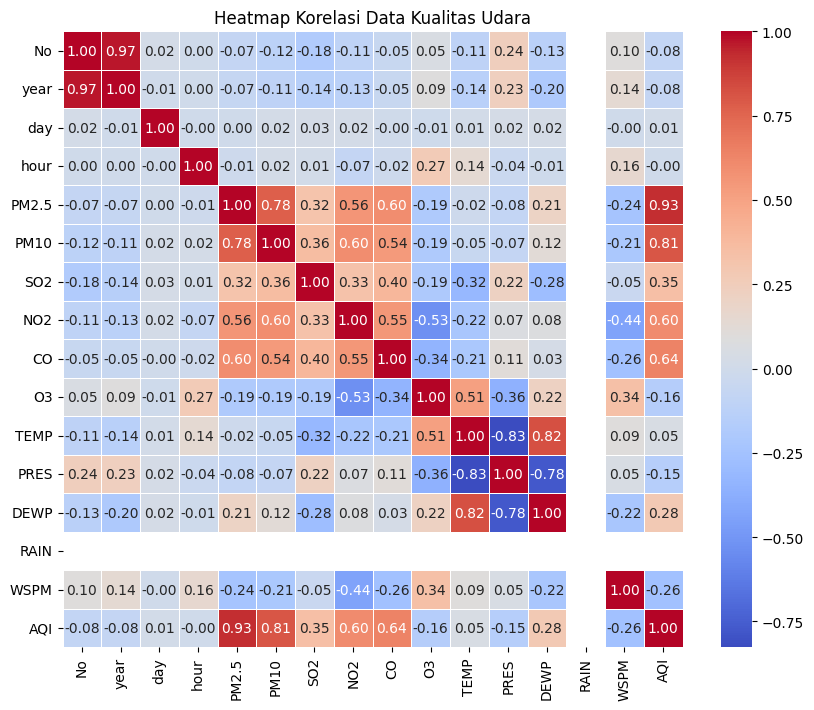

In [282]:
# Pilih hanya kolom numerik dan hitung korelasinya
corr_matrix = df.select_dtypes(include=['number']).corr()

# Tampilkan korelasi secara numerik
print("Matriks Korelasi AQI dengan Faktor Cuaca:")
print(corr_matrix["AQI"].sort_values(ascending=False))  # Urutkan berdasarkan korelasi dengan AQI

# Heatmap untuk melihat hubungan antar variabel
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Data Kualitas Udara")
plt.show()


**Insight:**
- PM2.5 dan PM10 memiliki korelasi tinggi dengan AQI (0.93 dan 0.81), menunjukkan bahwa partikel ini adalah faktor utama yang menentukan kualitas udara.
- Gas polutan seperti NO2, SO2, dan CO juga memiliki korelasi positif dengan AQI (0.60, 0.35, dan 0.64), menandakan bahwa peningkatan gas ini berdampak pada memburuknya kualitas udara.
- O₃ memiliki korelasi negatif dengan AQI (-0.16), yang berarti ozon mungkin tidak menjadi faktor dominan dalam indeks kualitas udara di dataset ini.
- Tekanan udara (PRES) berkorelasi negatif dengan AQI (-0.16), menandakan bahwa peningkatan tekanan udara sedikit berhubungan dengan perbaikan kualitas udara.
- Suhu (TEMP) berkorelasi positif dengan O₃ (0.51), menunjukkan bahwa kadar ozon meningkat saat suhu lebih tinggi.
- Kelembapan (DEWP) berkorelasi positif dengan AQI (0.29), menandakan bahwa kelembapan yang lebih tinggi berkontribusi terhadap meningkatnya polutan udara.
- Kecepatan angin (WSPM) berkorelasi negatif dengan AQI (-0.26), yang berarti angin yang lebih kencang membantu menyebarkan polutan sehingga meningkatkan kualitas udara.
- RAIN tidak memiliki korelasi yang signifikan, menunjukkan bahwa curah hujan kemungkinan tidak berperan besar dalam membersihkan polutan di atmosfer dalam dataset ini.


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana rata-rata kualitas udara (AQI) pertahun (2013-2017)?

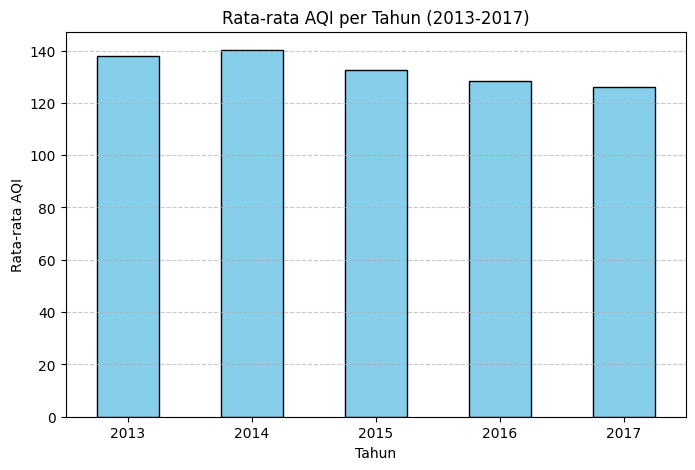

In [283]:
# Visualisasi rata-rata AQI per tahun dengan grafik batang
plt.figure(figsize=(8, 5))
aqi_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata AQI')
plt.title('Rata-rata AQI per Tahun (2013-2017)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- Rata-rata AQI mengalami tren penaikan di 2013-2014 dan penurunan dari 2014 hingga 2017, menunjukkan adanya perbaikan kualitas udara secara keseluruhan.
- AQI tertinggi terjadi pada tahun 2014, mengindikasikan kemungkinan peningkatan polusi udara pada tahun tersebut sebelum mulai menurun di 2015-2017.
- Penurunan AQI setelah 2014 dapat disebabkan oleh penurunan kadar polutan utama seperti PM2.5, PM10, dan gas polutan lainnya.

## Pertanyaan 2:
Bagaimana rata - rata kadar tiap polutan pertahun (2013-2017)?

<Figure size 1200x600 with 0 Axes>

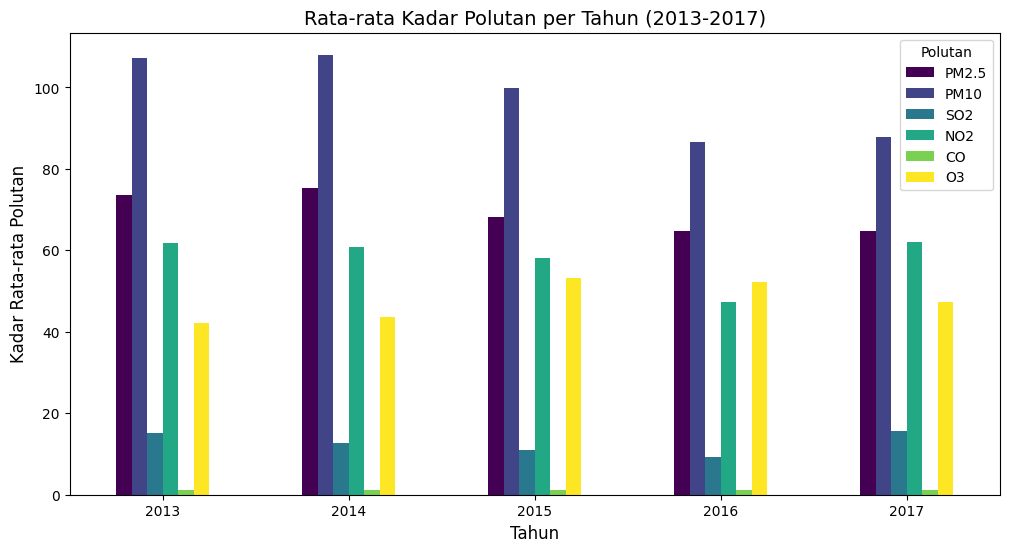

In [ ]:
# Plot bar chart dengan seaborn untuk kadar polutan
plt.figure(figsize=(12, 6))
yearly_avg_pollutants.set_index('year').plot(kind='bar', figsize=(12, 6), colormap='viridis')

plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Kadar Rata-rata Polutan", fontsize=12)
plt.title("Rata-rata Kadar Polutan per Tahun (2013-2017)", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Polutan")
plt.show()

**Insight:**
- PM10 dan PM2.5 memiliki kadar tertinggi dibandingkan polutan lainnya setiap tahun, menunjukkan bahwa partikel tersebut menjadi kontributor utama polusi udara.
- PM10 dan PM2.5 menunjukkan tren penurunan dari 2015 hingga 2017, yang sejalan dengan penurunan AQI dan menunjukkan adanya perbaikan kualitas udara.
- SO2 mengalami tren penurunan dari 2013 hingga 2016, tetapi kembali meningkat pada 2017
- NO2 cenderung stabil sepanjang tahun, dengan sedikit penurunan pada 2016 dan kenaikan kembali pada 2017.
- CO mengalami sedikit fluktuasi tetapi tetap dalam rentang yang relatif rendah dibandingkan polutan lainnya.
-O3 mengalami peningkatan secara bertahap, terutama setelah 2014,dan kembali menurun setelah 2015

## Pertanyaan 3:
# Bagaimana rata rata kualitas udara (AQI) per jamnya di tahun 2013-2017?

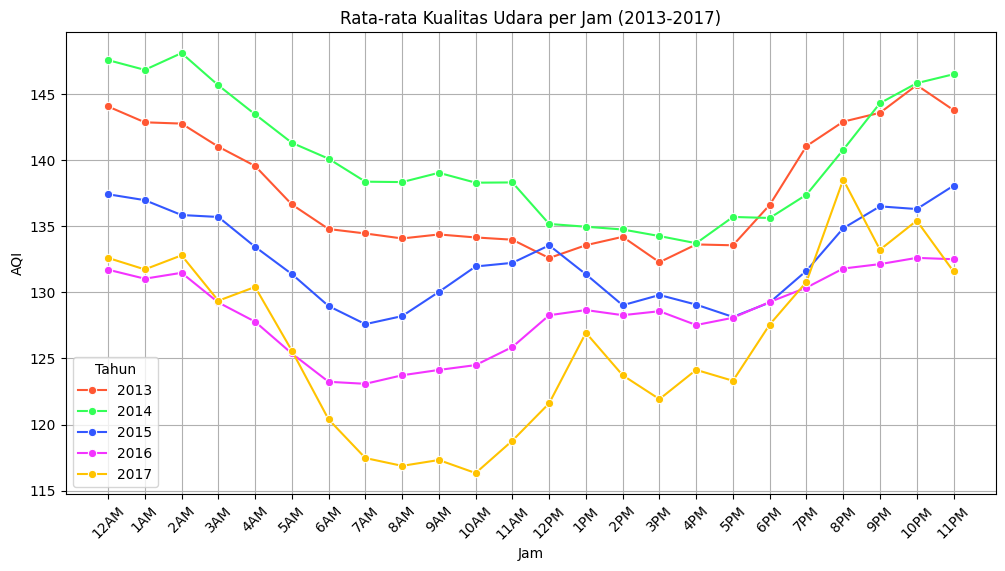

In [ ]:
# Ubah format hour menjadi string dengan AM/PM
hour_labels = [f"{h % 12 if h % 12 != 0 else 12}{'AM' if h < 12 else 'PM'}" for h in range(24)]

# Pilih warna khusus untuk setiap tahun
custom_colors = ["#FF5733", "#33FF57", "#3357FF", "#F333FF", "#FFC300"]  # Contoh warna (2013-2017)

# Membuat figure
plt.figure(figsize=(12,6))

# Membuat plot garis dengan warna khusus
sns.lineplot(data=aqi_per_hour, x="hour", y="AQI", hue="year", marker="o", palette=custom_colors)

# Sesuaikan tampilan
plt.xticks(ticks=range(24), labels=hour_labels, rotation=45) 
plt.xlabel("Jam")
plt.ylabel("AQI") 
plt.title("Rata-rata Kualitas Udara per Jam (2013-2017)")
plt.legend(title="Tahun")
plt.grid(True)

# Tampilkan plot
plt.show()

**Insight:**
- AQI cenderung lebih tinggi pada malam hari dan menurun menjelang pagi (4-7 AM)
- AQI terendah terjadi sekitar pukul 6-8 AM
- AQI cenderung mulai meningkat kembali pada siang hingga sore hari (11 AM - 6 PM)
- Puncak AQI terjadi pada malam hari sekitar pukul 9-11 PM, terutama pada tahun 2013 dan 2014, menunjukkan bahwa kualitas udara memburuk di waktu tersebut.
- Tren AQI tahun 2017 lebih rendah dibandingkan tahun-tahun sebelumnya, menunjukkan perbaikan kualitas udara secara keseluruhan.

## Pertanyaan 4:
# Apakah faktor cuaca mempengaruhi kualitas udara?

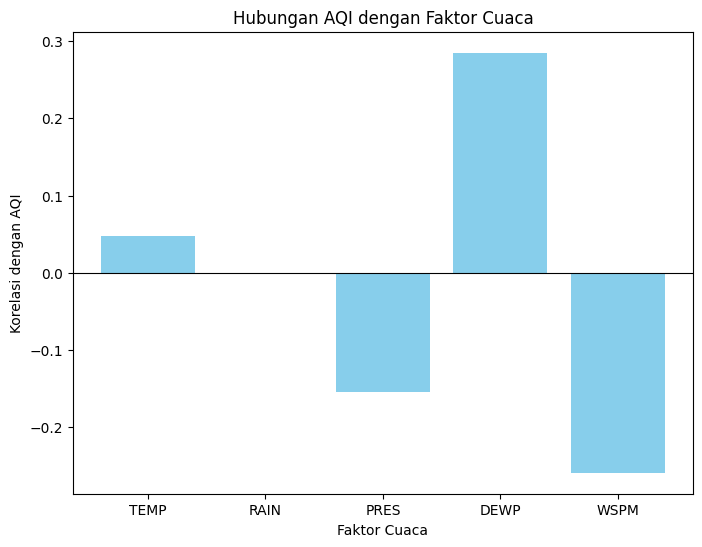

In [ ]:
# Pilih faktor cuaca yang relevan
weather_factors = ["TEMP", "RAIN", "PRES", "DEWP", "WSPM"]

# Ambil hanya korelasi dengan AQI
weather_corr = corr_matrix.loc[weather_factors, "AQI"]

# Buat plot batang
plt.figure(figsize=(8, 6))
plt.bar(weather_factors, weather_corr, color="skyblue")
plt.xlabel("Faktor Cuaca")
plt.ylabel("Korelasi dengan AQI")
plt.title("Hubungan AQI dengan Faktor Cuaca")
plt.axhline(0, color='black', linewidth=0.8)

# Tampilkan grafik
plt.show()

**Insight:**
- Dew Point (DEWP) memiliki korelasi positif tertinggi dengan AQI, menunjukkan bahwa saat kelembaban meningkat, polusi udara cenderung memburuk.
- Kecepatan angin (WSPM) memiliki korelasi negatif dengan AQI, artinya semakin tinggi kecepatan angin, semakin baik kualitas udara karena polutan lebih tersebar.
- Tekanan udara (PRES) memiliki korelasi negatif dengan AQI, yang menunjukkan bahwa ketika tekanan udara tinggi, kualitas udara cenderung lebih baik.
- Suhu (TEMP) memiliki korelasi sedikit positif dengan AQI, yang bisa menunjukkan bahwa suhu tinggi berkontribusi pada pembentukan ozon di atmosfer, meskipun dampaknya kecil.
- Hujan (RAIN) tidak menunjukkan pengaruh signifikan terhadap AQI, mungkin karena curah hujan yang rendah.

## Conclusion

- Kualitas udara di Aotizhongxin Station menunjukkan tren perbaikan dari tahun 2013 hingga 2017. Hal ini terlihat dari rata-rata AQI yang mengalami penurunan dari 137.73 pada 2013 menjadi 125.69 pada 2017, menunjukkan adanya perbaikan dalam kualitas udara selama periode tersebut.
- PM2.5 dan PM10 merupakan kontributor utama terhadap tingginya AQI. Dari analisis korelasi, PM2.5 memiliki korelasi sebesar 0.92 terhadap AQI, sementara PM10 memiliki korelasi sebesar 0.77, menunjukkan bahwa partikel-partikel ini sangat memengaruhi kualitas udara di wilayah ini.
- Polutan gas seperti NO2, SO2, dan CO juga memiliki kontribusi signifikan terhadap penurunan kualitas udara. Peningkatan kadar gas-gas ini sejalan dengan peningkatan AQI, yang berarti semakin tinggi polutan ini, semakin buruk kualitas udara.
- Analisis berdasarkan jam menunjukkan bahwa kualitas udara cenderung lebih buruk pada malam hingga dini hari, dan membaik di pagi hingga siang hari. AQI tertinggi terjadi sekitar 12 AM-2 AM dengan nilai mencapai di atas 145, sedangkan AQI terendah terjadi antara 6 AM-8 AM dengan nilai sekitar 115-120 pada tahun 2017.
- Faktor cuaca memiliki pengaruh terhadap AQI, seperti Dew Point yang menunjukkan bahwa kelembaban tinggi berkontribusi dalam peningkatan polusi, kecepatan angin yang membantu menyebarkan polutan dan meningkatkan kualitas udara, serta tekanan udara yang menunjukkan bahwa tekanan udara tinggi cenderung dikaitkan dengan udara yang lebih bersih. Sementara itu, curah hujan tidak memiliki korelasi signifikan dengan AQI, yang menunjukkan bahwa hujan mungkin dikarenakan curah hujan yang sedikit
- Pengendalian Emisi PM2.5 dan PM10 harus menjadi prioritas utama karena polutan ini memiliki dampak terbesar terhadap kualitas udara.
- Meningkatkan ruang hijau dan vegetasi di daerah perkotaan, karena tanaman dapat membantu menyerap polutan udara, terutama NO2 dan CO, yang memiliki korelasi tinggi dengan AQI.

In [289]:
aotizhongxin_df.to_csv("data/aotizhongxin_data.csv", index=False)